In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

mnist = fetch_openml("mnist_784", as_frame=False, version=1)

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# pca = PCA(n_components=154)

# X_reduced = pca.fit_transform(X)
# X_recover = pca.inverse_transform(X_reduced)

# X_centered = X - X.mean(axis=0)
# U, S, Vt = np.linalg.svd(X_centered)
# c1 = Vt.T[:, 0]
# c2 = Vt.T[:, 1]

In [3]:
# from sklearn.decomposition import IncrementalPCA

# n_batches = 100
# inc_pca = IncrementalPCA(n_components=154)
# for X_batch in np.array_split(X, n_batches):
#     inc_pca.partial_fit(X_batch)

# X_reduced = inc_pca.transform(X)

In [2]:
from sklearn.ensemble import RandomForestClassifier
import time

t0 = time.time()

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
t1 = time.time()


In [3]:
print("Training took {:.2f}s".format(t1 - t0))


Training took 38.95s


In [4]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [5]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)



In [7]:

rfc2 = RandomForestClassifier(n_estimators=100, random_state=42)
t0 = time.time()
rfc2.fit(X_reduced, y_train)
t1 = time.time()

# X_recover = pca.inverse_transform(X_reduced)


In [8]:
print("Training took {:.2f}s".format(t1 - t0))


Training took 98.80s


In [10]:
X_test_reduced = pca.transform(X_test)

y_pred = rfc2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)


0.9481

In [11]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()


/home/tatsuyafukui/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print("Training took {:.2f}s".format(t1 - t0))


Training took 62.90s


In [13]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9255

In [15]:
log_clf2 = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_reduced, y_train)
t1 = time.time()


/home/tatsuyafukui/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print("Training took {:.2f}s".format(t1 - t0))


Training took 17.73s


In [17]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)


0.9201

In [30]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]


In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)



/home/tatsuyafukui/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tatsuyafukui/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


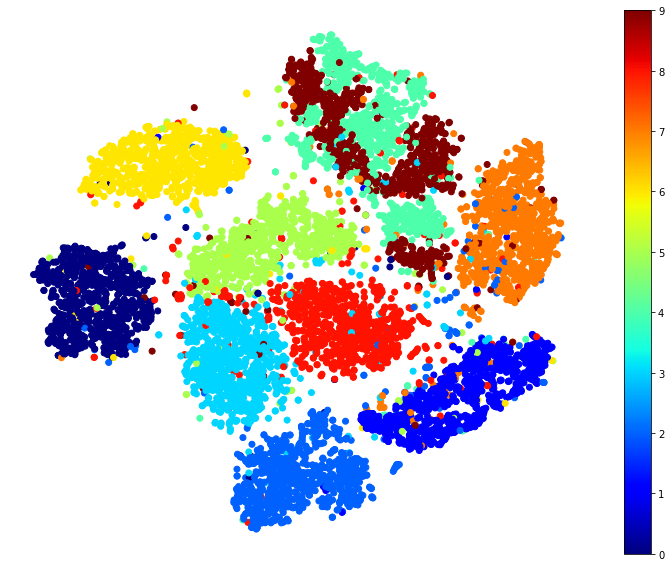

In [57]:

import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap="jet", c=[y])
plt.axis('off')
plt.colorbar()
plt.show()


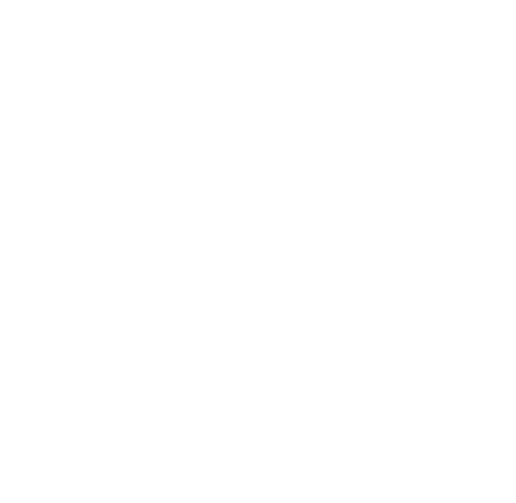

In [66]:
import matplotlib as mpl

plt.figure(figsize=(9, 9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0],
                X_reduced[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()


In [67]:
idx = (y == 2) | (y == 3) | (y == 5)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)
plt.figure(figsize=(9, 9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()


/home/tatsuyafukui/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/tatsuyafukui/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


ValueError: Found array with 0 sample(s) (shape=(0, 784)) while a minimum of 2 is required.